# Experimentation with the StarGAN-VC model with different number of speakers
## ASV evaluation with the anonymized audiofiles by increasing the number of speakers
1. The number of speakers is slowly increased by 10, 25 or 50 for both ignorant and lazy-informed scenario
2. We run the experiments multiple times for different target selections (i.e. different seeds)
3. The added speakers are randomly sampled 5 times for larger ones from the entire speaker population to avoid any bias (Srivastava et al., 2022) 

<b> Hypothesis</b>: The EER of the ASV system will increase, as the number of source speakers
increases. A larger population of speakers will escalate the system’s task complexity due to the necessity of detecting a greater number of non-matching speaker pairs, thereby leading to a higher error rate <br>

The following datasets from LibriSpeech are evaluated:
1. test-clean & test-other
2. train-other-500

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt



/tmp/ipykernel_87073/2862603903.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Evaluation with test-clean and test-other (73 speakers)
The speakers are increased by 10. We run the experiments for 5 different target selections (seeds).

### a) Results for StarGAN-VC

In [2]:
file_pattern = "results_speakers/results_stargan_speakers/ls-test-clean-other/stargan_tco_speakers#*.txt" 

In [3]:
all_files = glob.glob(file_pattern)

##### Averaging over five target selections


In [4]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [5]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overall_stats/overall_stats_stargan_tco_num_speakers.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the overall statistics in a table
print("Overall statistics for ls-test-clean&other:")
display(overall_stats)

Overall statistics for ls-test-clean&other:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
10                 35.333333  7.671228         19.911111  7.663982
20                 35.089474  4.805593         22.236842  6.736384
30                 35.186207  3.435532         22.558621  3.459040
40                 35.325641  3.586304         21.674359  2.090641
50                 35.985306  2.682694         22.707755  2.201346
60                 36.066102  2.052738         22.709605  1.815891
70                 35.898137  1.897150         22.670807  1.232522

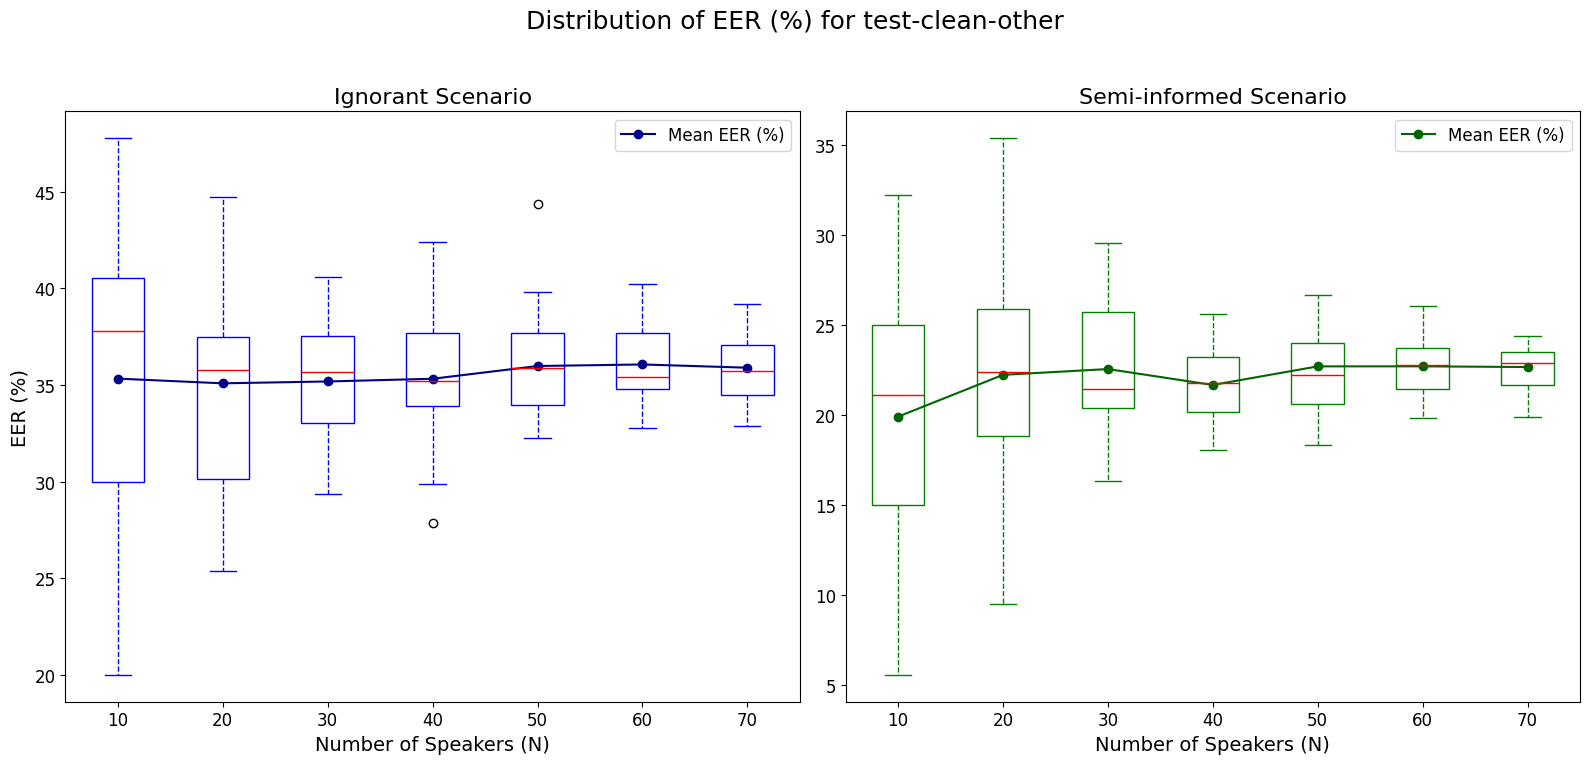

In [7]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) for test-clean-other', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/boxplots/stargan_tco_speakes.png')
plt.savefig('overall_stats/boxplots/stargan_tco_speakes.pdf')  


plt.show()


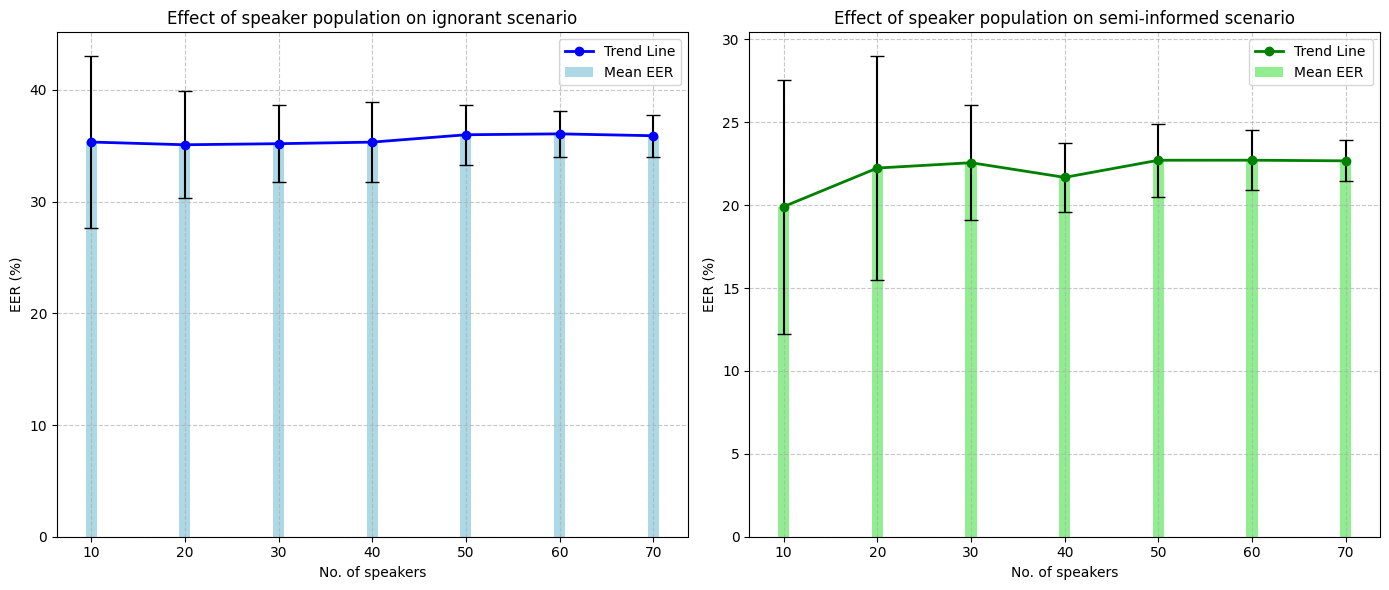

In [10]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of speaker population on ignorant scenario')
axs[0].set_xlabel('No. of speakers')
axs[0].set_ylabel('EER (%)')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of speaker population on semi-informed scenario')
axs[1].set_xlabel('No. of speakers')
axs[1].set_ylabel('EER (%)')

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/stargan_tco_speakers.png')
plt.savefig('overall_stats/bar_charts/stargan_tco_speakers.pdf')  

plt.tight_layout()
plt.show()


### b) Results for kNN-VC

In [11]:
file_pattern = "results_speakers/results_knnvc_speakers/ls-test-clean-other/knnvc_tco_speakers#*.txt" 

In [12]:
all_files = glob.glob(file_pattern)

##### Averaging over five target selections


In [13]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)


In [14]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

overall_stats.to_csv('overall_stats/overall_stats_knnvc_tco_num_speakers.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

# Display the overall statistics in a table
print("Overall Statistics Across All Files:")
display(overall_stats)

Overall Statistics Across All Files:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
10                 43.355556  7.599613          9.511111  4.500000
20                 45.573684  4.812967         10.573684  3.352011
30                 43.825287  4.222087         10.972414  3.134552
40                 44.055128  3.474413         10.648718  2.986727
50                 44.021224  2.253089         11.022857  2.488906
60                 44.560452  2.606565         10.428814  2.489801
70                 44.707246  2.297949         10.460041  2.011838

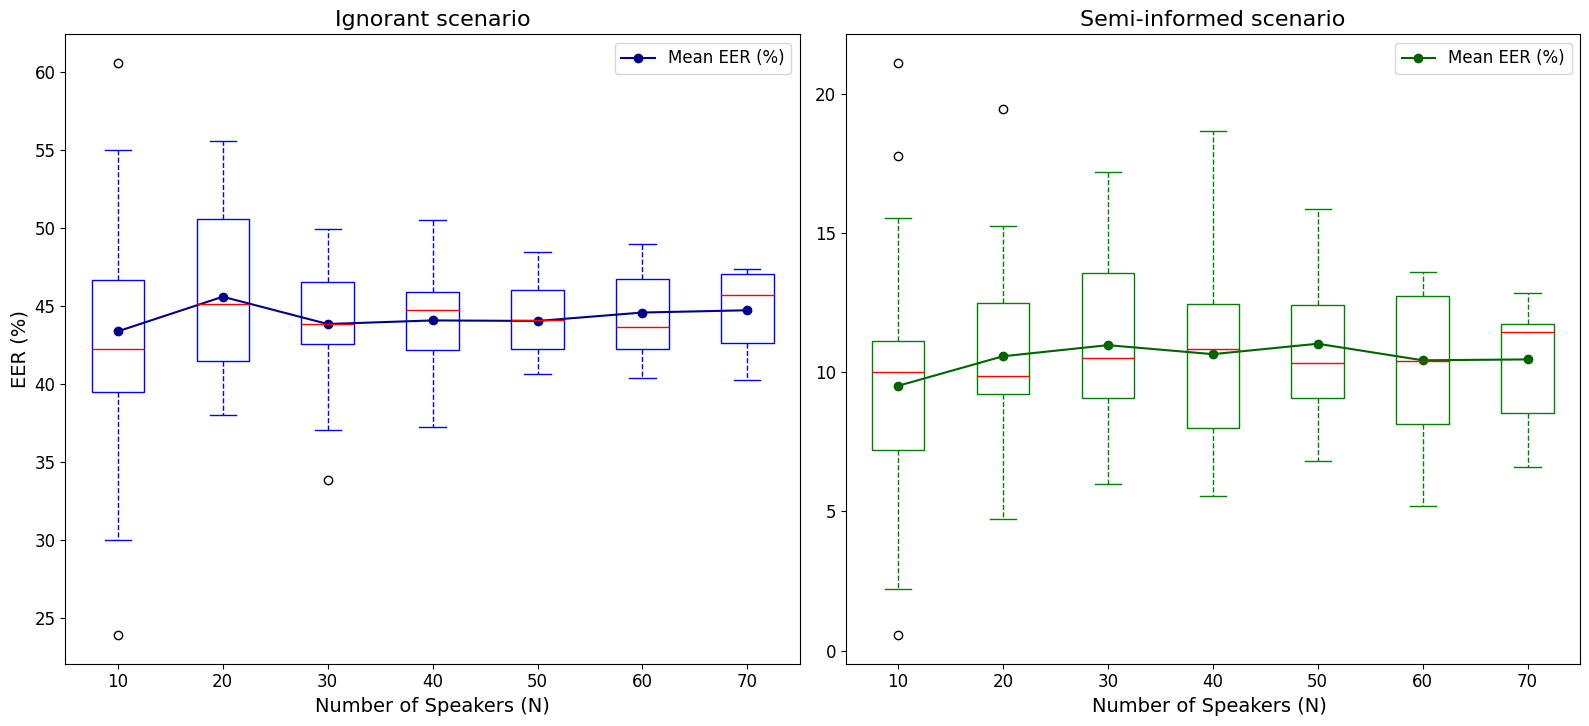

In [15]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-informed scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers (N) ', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig('overall_stats/boxplots/knnvc_tco_speakers.png', dpi=300, bbox_inches='tight')  # Save as high-resolution PNG
plt.savefig('overall_stats/boxplots/knnvc_tco_speakers.pdf', bbox_inches='tight')  # Save as PDF

plt.show()



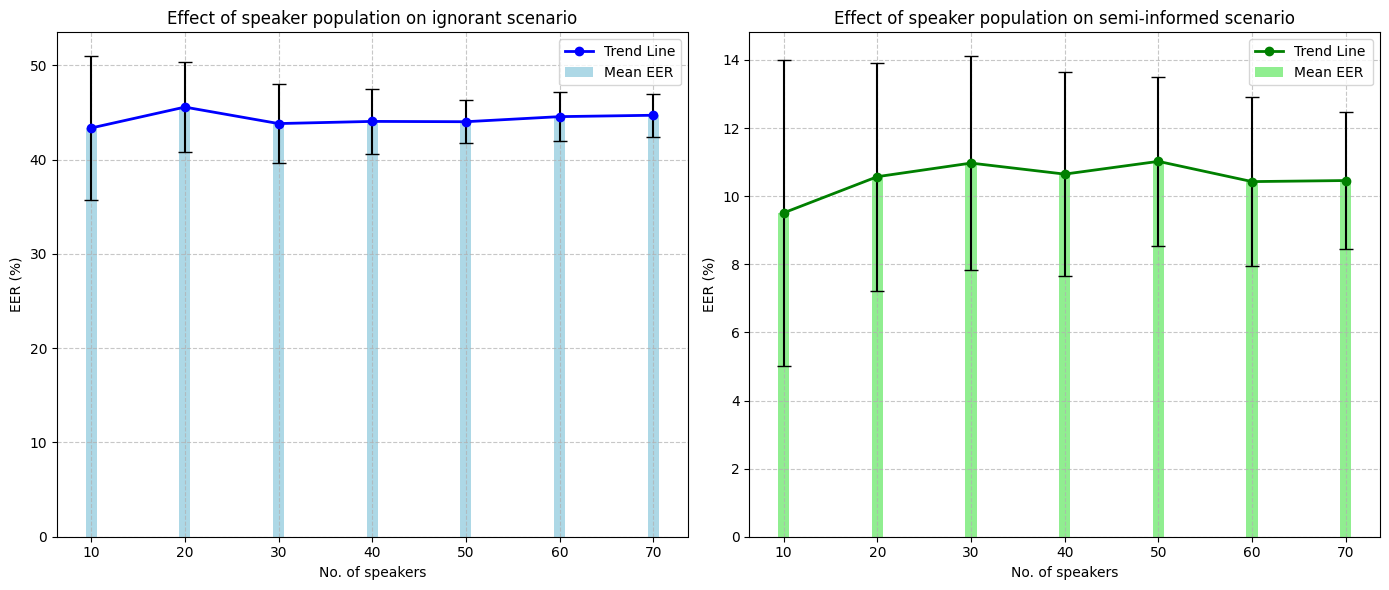

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of speaker population on ignorant scenario')
axs[0].set_xlabel('No. of speakers')
axs[0].set_ylabel('EER (%)')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of speaker population on semi-informed scenario')
axs[1].set_xlabel('No. of speakers')
axs[1].set_ylabel('EER (%)')

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/knnvc_tco_speakers.png')
plt.savefig('overall_stats/bar_charts/knnvc_tco_speakers.pdf')  

plt.tight_layout()
plt.show()


### 2. Evaluation with ls-train-other-500 (1166 speakers)
The speakers are increased by 50. We run the experiments for 4 different target selections (seeds).

### a) Results for StarGAN-VC

In [17]:
file_pattern = "results_speakers/results_stargan_speakers/ls-train-other-500/stargan_to500_speakers#*.txt" 

In [18]:
all_files = glob.glob(file_pattern)

Averaging over five target selections

In [19]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [24]:

# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})
overall_stats.to_csv('overall_stats/overall_stats_stargan_to500_num_speakers.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

full_df = full_df[(full_df['num_of_speakers'] % 100 == 0) | (full_df['num_of_speakers'] == 50)]
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for train-other-500:")
display(overall_stats)

Overall Statistics for train-other-500:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
50                 28.055782  3.216282         14.470748  1.868537
100                26.623569  2.750106         14.601010  2.659636
200                26.597152  1.762026         15.523019  1.456938
300                26.862542  1.584425         14.865945  1.001518
400                27.067314  0.866752         15.394600  0.937891
500                27.180975  0.599392         15.042284  0.763519
600                26.993777  0.808101         15.230534  0.560879
700                27.071265  0.780211         15.359603  0.518354
800                27.202581  0.723818         15.166904  0.653017
900                26.977461  0.652755         15.004704  0.527610
1000               26.981018  0.609442         15.176181  0.471338

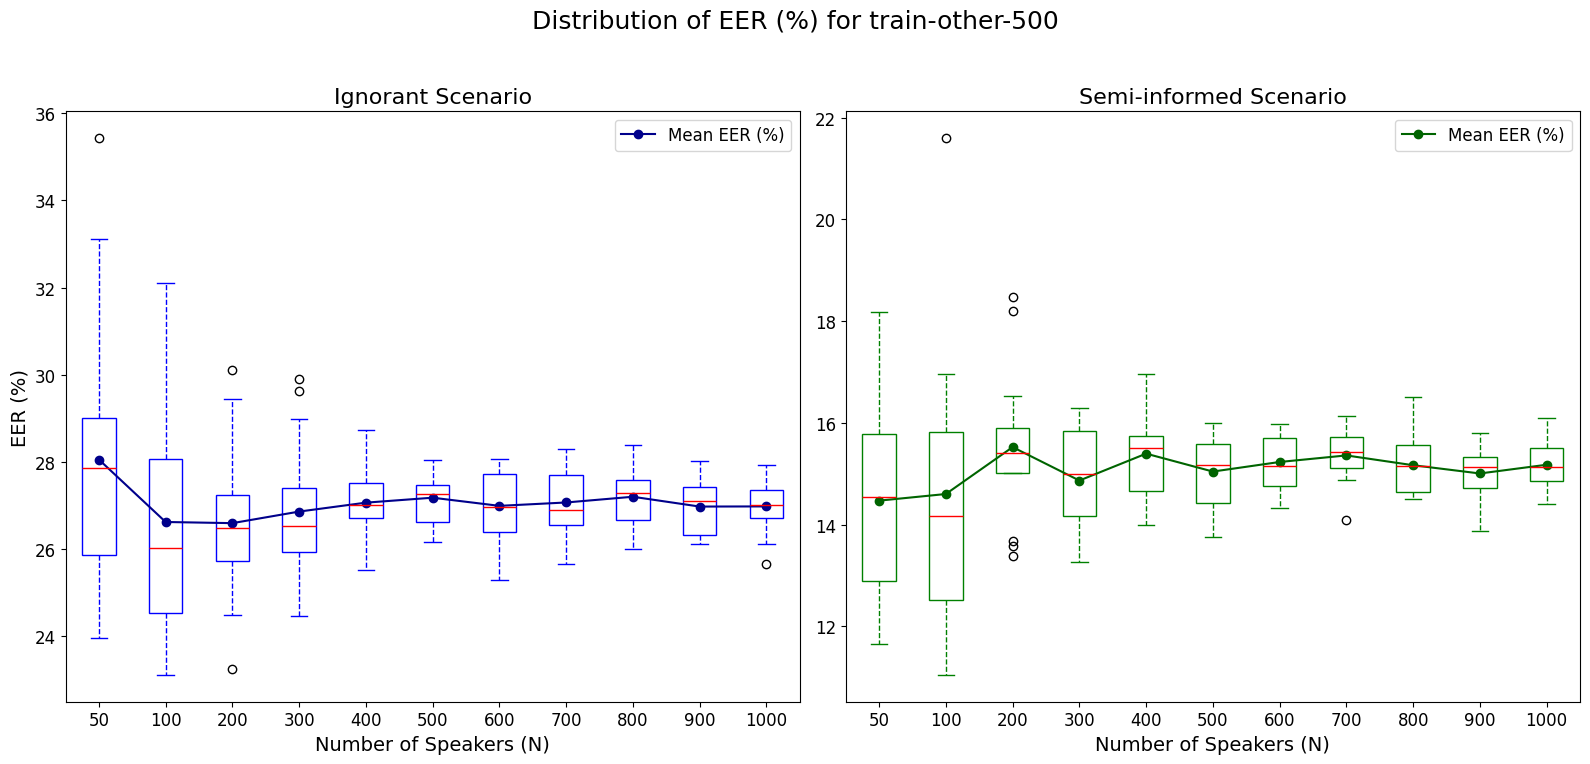

In [25]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) for train-other-500', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/boxplots/stargan_to500_speakes.png')
plt.savefig('overall_stats/boxplots/stargan_to500_speakes.pdf')  

plt.show()

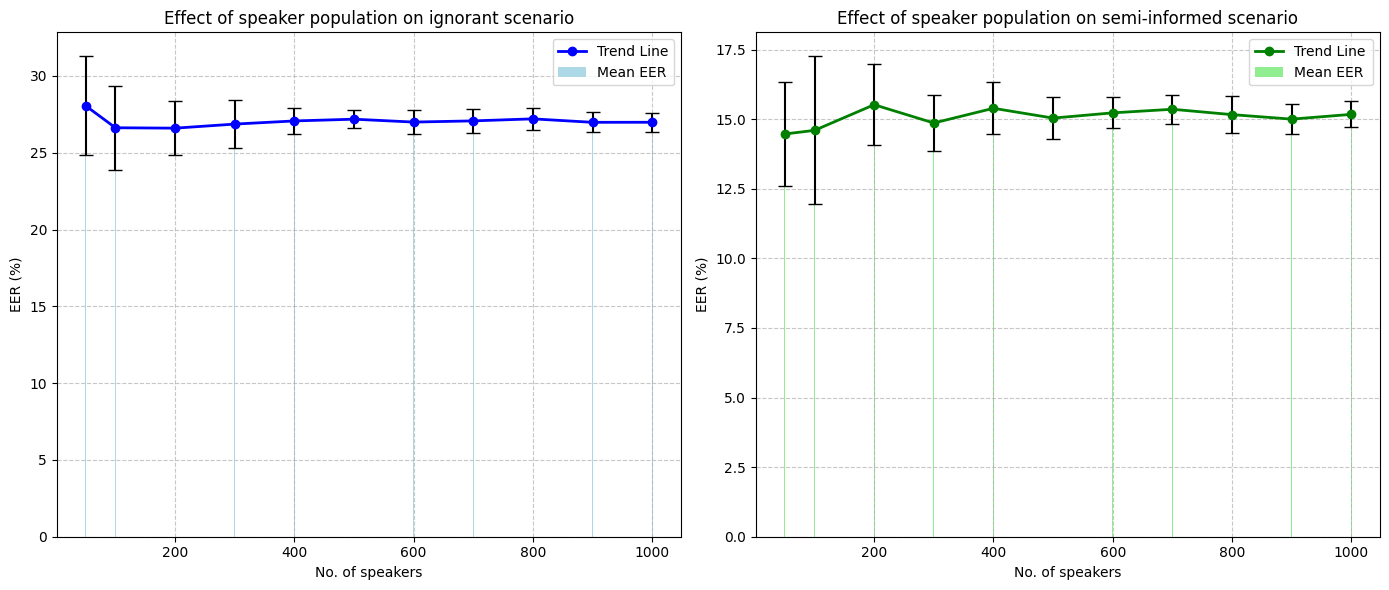

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of speaker population on ignorant scenario')
axs[0].set_xlabel('No. of speakers')
axs[0].set_ylabel('EER (%)')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of speaker population on semi-informed scenario')
axs[1].set_xlabel('No. of speakers')
axs[1].set_ylabel('EER (%)')

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/stargan_to500_speakers.png')
plt.savefig('overall_stats/bar_charts/stargan_to500_speakers.pdf')  

plt.tight_layout()
plt.show()

### b) Results for kNN-VC

In [27]:
file_pattern = "results_speakers/results_knnvc_speakers/ls-train-other-500/knnvc_to500_speakers#*.txt" 

In [28]:
all_files = glob.glob(file_pattern)

Aggregating over five target selections

In [29]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [30]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})
overall_stats.to_csv('overall_stats/overall_stats_knnvc_to500_num_speakers.csv', index=True)  # Set index=False if you do not want to include the DataFrame index as a column in the CSV file

full_df = full_df[(full_df['num_of_speakers'] % 100 == 0) | (full_df['num_of_speakers'] == 50)]
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for train-other-500:")
display(overall_stats)

Overall Statistics for train-other-500:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
50                 40.076531  3.573689          4.156122  1.243026
100                40.278535  2.310668          4.650000  1.185776
200                40.979209  1.818778          5.220101  0.688040
300                40.656856  1.348532          5.098690  0.574695
400                41.041118  1.259664          5.046554  0.553498
500                40.493783  1.041549          5.142555  0.388873
600                40.814058  0.967275          4.923685  0.399132
700                40.625235  0.924299          5.124223  0.348652
800                40.957353  0.802079          5.178055  0.265591
900                41.025289  1.323881          5.135963  0.254242
1000               40.969906  0.675782          5.206108  0.199350

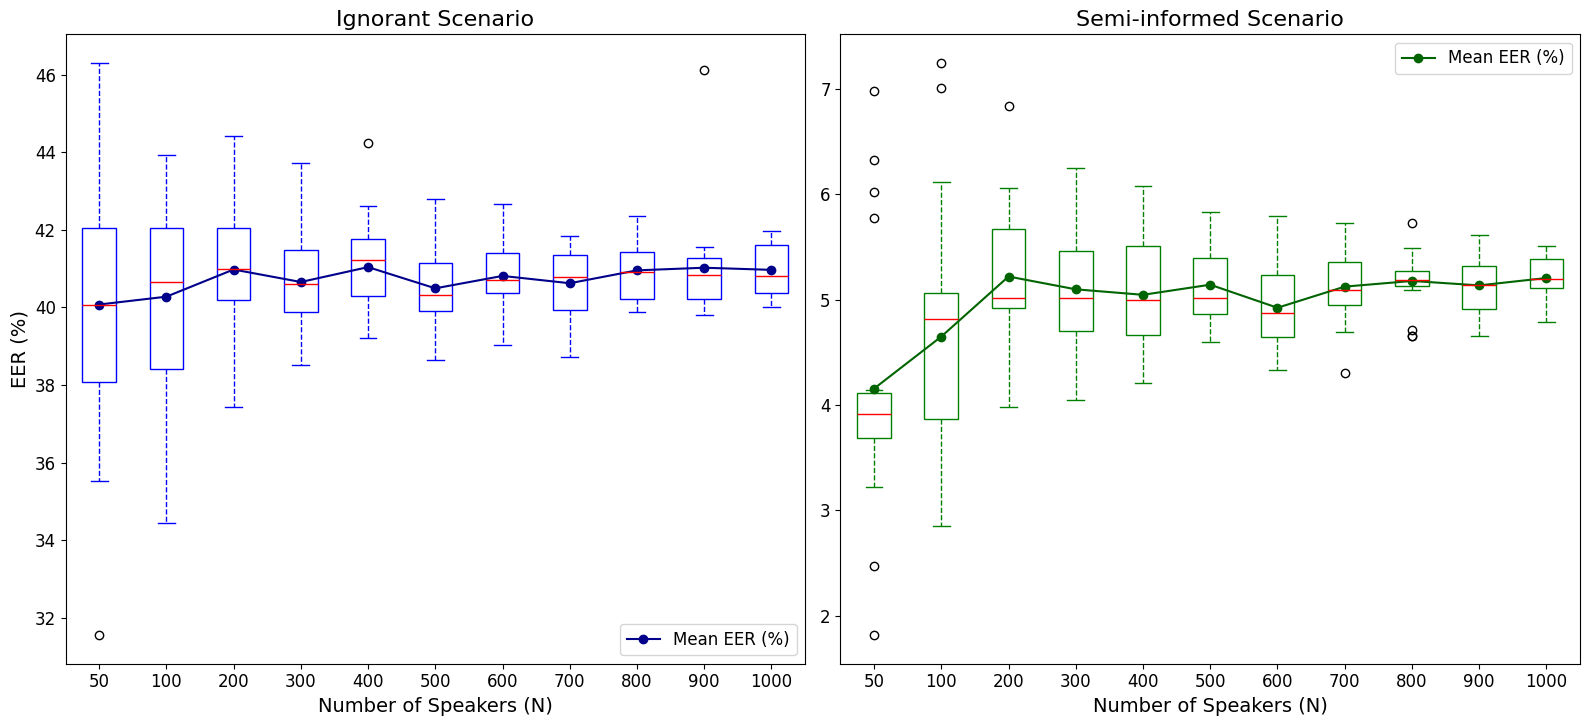

In [32]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue', linestyle='--'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='white', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='green', linestyle='--'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Semi-informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers (N)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overall_stats/boxplots/knnvc_to500_speakers.png')
plt.savefig('overall_stats/boxplots/knnvc_to500_speakers.pdf')  

plt.show()

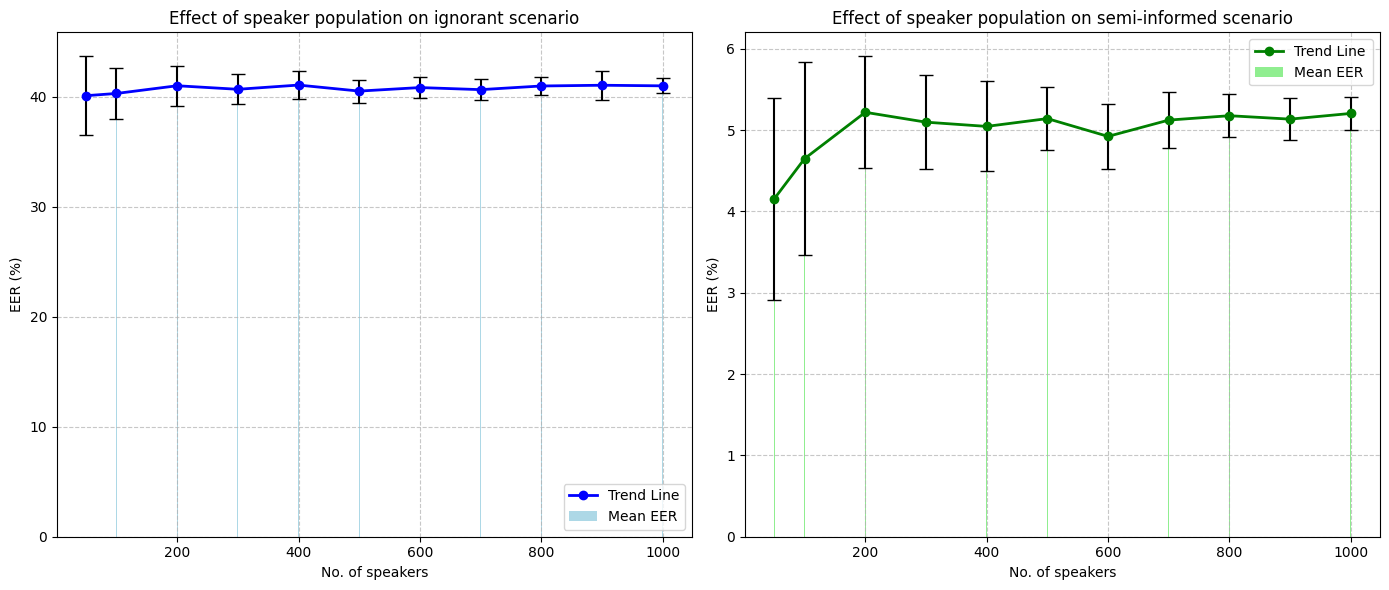

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for eer_ignorant
axs[0].bar(overall_stats.index, overall_stats['eer_ignorant']['mean'], yerr=overall_stats['eer_ignorant']['std'], capsize=5, color='lightblue', width=1.2, label='Mean EER')
axs[0].plot(overall_stats.index, overall_stats['eer_ignorant']['mean'], marker='o', color='blue', linestyle='-', linewidth=2, label='Trend Line')
axs[0].set_title('Effect of speaker population on ignorant scenario')
axs[0].set_xlabel('No. of speakers')
axs[0].set_ylabel('EER (%)')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Bar chart for eer_lazy-informed
axs[1].bar(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], yerr=overall_stats['eer_lazy-informed']['std'], capsize=5, color='lightgreen', width=1.2, label='Mean EER ')
axs[1].plot(overall_stats.index, overall_stats['eer_lazy-informed']['mean'], marker='o', color='green', linestyle='-', linewidth=2, label='Trend Line')
axs[1].set_title('Effect of speaker population on semi-informed scenario')
axs[1].set_xlabel('No. of speakers')
axs[1].set_ylabel('EER (%)')

axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig('overall_stats/bar_charts/knnvc_to500_speakers.png')
plt.savefig('overall_stats/bar_charts/knnvc_to500_speakers.pdf')  

plt.tight_layout()
plt.show()